# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Read data

In [2]:
df = pd.read_csv("airbnb_cleaned.csv")
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,4,18,0,60,4,118,4,141
1,6,95,1,17,2,6,1,0
2,6,98,0,90,62,143,1,220
3,10,110,1,26,5,25,1,297
4,6,49,1,42,2,197,1,26
...,...,...,...,...,...,...,...,...
18582,2,76,1,25,2,1,1,32
18583,11,84,0,99,1,5,2,339
18584,1,32,1,25,1,1,1,8
18585,6,95,0,70,1,1,1,350


### Scaling Menggunakan MinMaxScaler

In [3]:
df_scaler = MinMaxScaler().fit_transform(df)
df_scaler

D:\AI\Python\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.36363636, 0.13333333, 0.        , ..., 0.23541247, 0.06818182,
        0.38630137],
       [0.54545455, 0.7037037 , 0.5       , ..., 0.01006036, 0.        ,
        0.        ],
       [0.54545455, 0.72592593, 0.        , ..., 0.28571429, 0.        ,
        0.60273973],
       ...,
       [0.09090909, 0.23703704, 0.5       , ..., 0.        , 0.        ,
        0.02191781],
       [0.54545455, 0.7037037 , 0.        , ..., 0.        , 0.        ,
        0.95890411],
       [0.54545455, 0.72592593, 0.        , ..., 0.00201207, 0.        ,
        0.1890411 ]])

### Reduksi Dimensi menggunakan PCA

In [4]:
# Reduksi dari data yang sudah discaling
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaler)
df0 = pd.DataFrame(data = principalComponents, columns = ['a', 'b'])
df0.head()

,a,b
0,0.310706,-0.376254
1,-0.285028,0.131548
2,0.391067,0.272654
3,0.484765,0.524452
4,-0.112766,-0.163090


In [6]:
# Reduksi dari data yang tidak discaling
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
df1 = pd.DataFrame(data = principalComponents, columns = ['a', 'b'])
df1.head()

,a,b
0,12.591530,-66.517817
1,-62.497018,74.249028
2,58.975782,-139.404320
3,10.225954,-213.737321
4,-28.375294,33.776677


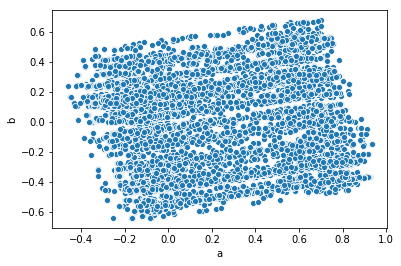

In [7]:
sns.scatterplot(x=df0['a'],y=df0['b'])

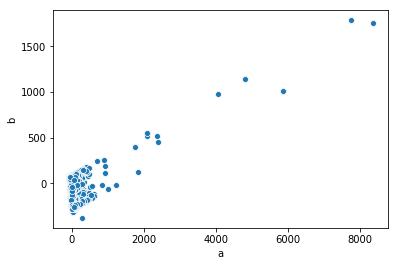

In [8]:
sns.scatterplot(x=df1['a'],y=df1['b'])

# K-Means from Scratch

#### Inisiasi centroid sebanyak K

In [9]:
def initiate(k):   
    pointa = []
    pointb = []
    for i in range(k) :
        r = (np.random.randint(len_data))
        pointa.append(a[r])
        pointb.append(b[r])
    return(pointa, pointb)

#### Menghitung jarak antar data dengan centroid menggunakan euclidean distance

In [10]:
def dist_func(pointa,pointb):
    distance = []
    for i in range(len_data) :
        d = []
        for j in range(k) :
            dist = np.sqrt((pointa[j]-a[i])**2 + (pointb[j]-b[i])**2)
            d.append(dist)
        distance.append(d)
    return distance

#### Mengambil nilai jarak minimum antar setiap data ke centroid

In [11]:
def min_func(distance):
    minimal = []
    for i in range(len_data):
        minimal.append(distance[i].index(min(distance[i])))
    return minimal

#### Melakukan perulangan dengan mengganti centroid dengan centroid baru

In [12]:
def new_centroid(minimal):
    pointa = []
    pointb = []
    for i in range(k):
        sumA = 0
        sumB = 0
        inc = 0
        for j in range(len_data):
            if minimal[j] == i:
                sumA += a[j]
                sumB += b[j]
                inc += 1
        if inc != 0 :
            pointa.append((sumA/inc))
            pointb.append((sumB/inc))
        if inc == 0:
            pointa.append(0)
            pointb.append(0)
    return pointa, pointb

#### Melakukan evaluasi dengan Sum Square Error 

In [13]:
def sse_evaluation(centroid_list, data_list) :
    sse = 0
    for i in range(1000) :
        dist = []
        for j in range(len(centroid_list)) :
            d = np.sqrt((data_list[i][0]-centroid_list[j][0])**2 + 
                        (data_list[i][1]-centroid_list[j][1])**2)
            dist.append(d)
        sse += min(dist) ** 2
    return sse

## Eksperimen Model

Model 1 : Menggunakan MinMaxScaler


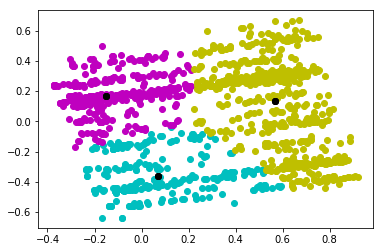

SSE Model  1  :  72.32641844280317
Model 2 : Tanpa Menggunakan MinMaxScaler


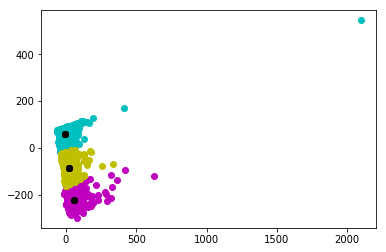

SSE Model  2  :  8102377.79942651


In [14]:
eks = [df0, df1]
for l in range(len(eks)) :
    k = 3
    len_data = 1500
    if (l == 0) :
        a = df0['a']
        b = df0['b']
        print("Model 1 : Menggunakan MinMaxScaler")
    else : 
        a = df1['a']
        b = df1['b']
        print("Model 2 : Tanpa Menggunakan MinMaxScaler")
    init = initiate(k)
    pointa = init[0]
    pointb = init[1]
    prepointa = []
    prepointb = []
    while ((prepointa != pointa) or (prepointb != pointb)) :
        prepointa = pointa
        prepointb = pointb
        distance = dist_func(pointa,pointb)
        minimal = min_func(distance)
        centroid = new_centroid(minimal)
        pointa = centroid[0]
        pointb = centroid[1]


    result = [[],[],[]]
    arr_color = ['co','mo','yo']
    for j in range(k):    
        for i in range(len_data):
            if(minimal[i] == j):
                plt.plot(a[i], b[i], arr_color[j])    
                result[j].append((a[i], b[i], j))
    for i in range(3):
        plt.plot(pointa, pointb, 'ko')
    plt.show()
    
    data_list = list(zip(a,b))
    centroid_list = list(zip(pointa,pointb))
    print("SSE Model ",l+1," : ", sse_evaluation(centroid_list, data_list))
    print("============================================")